<a href="https://colab.research.google.com/github/Coder-twhjr/Hunting-Exoplanets-In-Space/blob/main/Hunting_Exoplanets_In_Space_Fast_Fourier_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hunting Exoplanets In Space - Fast Fourier Transformation

---

#### Loading The Datasets

In [1]:
import numpy as np
import pandas as pd


exo_train_df = pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTrain.csv')
exo_test_df = pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTest.csv')

In [2]:
print(exo_train_df.shape)
exo_test_df.shape

(5087, 3198)


(570, 3198)

---

#### Data Normalisation

In [3]:
def mean_normalise(series):
  norm_series = (series - series.mean()) / (series.max() - series.min())
  return norm_series

In [4]:
norm_train_df = exo_train_df.iloc[:, 1:].apply(mean_normalise, axis=1)
norm_train_df.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0.053834,0.047391,0.006510,-0.023699,-0.031772,-0.086410,-0.093128,-0.068161,-0.057650,-0.109164,...,-0.056482,-0.071934,-0.071934,0.009738,0.024779,0.052993,0.018843,0.033024,-0.003127,-0.031759
1,-0.050411,-0.042317,-0.081922,-0.052351,-0.115212,-0.104794,-0.126816,-0.124861,-0.122681,-0.105708,...,0.006648,-0.039721,-0.039721,-0.027988,0.004116,0.013124,-0.006847,0.022260,0.037550,0.043849
2,0.243983,0.245509,0.235186,0.227365,0.208538,0.212981,0.212283,0.222467,0.199285,0.221536,...,-0.037161,0.002382,0.002382,-0.017715,-0.013523,-0.001456,-0.009299,-0.017259,-0.036384,-0.048782
3,0.518501,0.551177,0.480659,0.474051,0.504754,0.496863,0.511941,0.494687,0.496425,0.513506,...,0.016215,0.001435,0.001435,0.054324,0.038636,-0.012562,-0.006456,-0.019827,-0.019889,0.029163
4,-0.399904,-0.401872,-0.404199,-0.395473,-0.381734,-0.373293,-0.360070,-0.368986,-0.356861,-0.350022,...,-0.212262,-0.141752,-0.141752,-0.125499,-0.157156,-0.155246,-0.141038,-0.135528,-0.145458,-0.181590


In [5]:
norm_train_df.insert(loc=0, column='LABEL', value=exo_train_df['LABEL'])
norm_train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.053834,0.047391,0.006510,-0.023699,-0.031772,-0.086410,-0.093128,-0.068161,-0.057650,...,-0.056482,-0.071934,-0.071934,0.009738,0.024779,0.052993,0.018843,0.033024,-0.003127,-0.031759
1,2,-0.050411,-0.042317,-0.081922,-0.052351,-0.115212,-0.104794,-0.126816,-0.124861,-0.122681,...,0.006648,-0.039721,-0.039721,-0.027988,0.004116,0.013124,-0.006847,0.022260,0.037550,0.043849
2,2,0.243983,0.245509,0.235186,0.227365,0.208538,0.212981,0.212283,0.222467,0.199285,...,-0.037161,0.002382,0.002382,-0.017715,-0.013523,-0.001456,-0.009299,-0.017259,-0.036384,-0.048782
3,2,0.518501,0.551177,0.480659,0.474051,0.504754,0.496863,0.511941,0.494687,0.496425,...,0.016215,0.001435,0.001435,0.054324,0.038636,-0.012562,-0.006456,-0.019827,-0.019889,0.029163
4,2,-0.399904,-0.401872,-0.404199,-0.395473,-0.381734,-0.373293,-0.360070,-0.368986,-0.356861,...,-0.212262,-0.141752,-0.141752,-0.125499,-0.157156,-0.155246,-0.141038,-0.135528,-0.145458,-0.181590


In [6]:
norm_test_df = exo_test_df.iloc[:, 1:].apply(mean_normalise, axis=1)
norm_test_df.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0.273347,0.228221,0.196676,0.110003,0.104130,0.088690,0.040926,0.014337,0.013534,-0.052079,...,0.031635,0.042578,0.031451,-0.005393,0.028904,0.102708,0.071576,0.080408,0.616438,0.130742
1,0.394038,0.391480,0.392680,0.390974,0.388955,0.386673,0.386340,0.382364,0.381035,0.374634,...,-0.047311,-0.075404,-0.092643,-0.118456,-0.134109,-0.150638,-0.164944,-0.171944,-0.166961,-0.148790
2,0.648150,0.627582,0.591444,0.519002,0.466046,0.385214,0.340496,0.281192,0.162553,0.119260,...,0.018179,-0.034769,-0.032201,-0.041117,-0.057967,-0.128412,-0.067972,-0.119374,-0.023437,0.027941
3,-0.232813,-0.233212,-0.238944,-0.235869,-0.208281,-0.220224,-0.222214,-0.208586,-0.197319,-0.188186,...,0.056186,0.047254,0.047254,0.039873,0.021893,0.025227,0.025075,-0.017912,-0.059585,-0.046740
4,-0.006994,0.003426,0.006382,0.007610,0.003316,-0.000167,0.010016,-0.009471,0.008195,0.016842,...,-0.006247,-0.016795,-0.001531,0.001095,-0.004439,-0.027127,-0.025421,-0.016852,-0.020089,0.002564


In [7]:
norm_test_df.insert(loc=0, column='LABEL', value=exo_test_df['LABEL'])
norm_test_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.273347,0.228221,0.196676,0.110003,0.104130,0.088690,0.040926,0.014337,0.013534,...,0.031635,0.042578,0.031451,-0.005393,0.028904,0.102708,0.071576,0.080408,0.616438,0.130742
1,2,0.394038,0.391480,0.392680,0.390974,0.388955,0.386673,0.386340,0.382364,0.381035,...,-0.047311,-0.075404,-0.092643,-0.118456,-0.134109,-0.150638,-0.164944,-0.171944,-0.166961,-0.148790
2,2,0.648150,0.627582,0.591444,0.519002,0.466046,0.385214,0.340496,0.281192,0.162553,...,0.018179,-0.034769,-0.032201,-0.041117,-0.057967,-0.128412,-0.067972,-0.119374,-0.023437,0.027941
3,2,-0.232813,-0.233212,-0.238944,-0.235869,-0.208281,-0.220224,-0.222214,-0.208586,-0.197319,...,0.056186,0.047254,0.047254,0.039873,0.021893,0.025227,0.025075,-0.017912,-0.059585,-0.046740
4,2,-0.006994,0.003426,0.006382,0.007610,0.003316,-0.000167,0.010016,-0.009471,0.008195,...,-0.006247,-0.016795,-0.001531,0.001095,-0.004439,-0.027127,-0.025421,-0.016852,-0.020089,0.002564


---

#### Transpose Of A DataFrame


In [8]:
exo_train_df.T

,0,1,2,3,4,5,6,7,8,9,...,5077,5078,5079,5080,5081,5082,5083,5084,5085,5086
LABEL,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
FLUX.1,93.85,-38.88,532.64,326.52,-1107.21,211.10,9.34,238.77,-103.54,-265.91,...,125.57,7.45,475.61,-46.63,299.41,-91.91,989.75,273.39,3.82,323.28
FLUX.2,83.81,-33.83,535.92,347.39,-1112.59,163.57,49.96,262.16,-118.97,-318.59,...,78.69,10.02,395.50,-55.39,302.77,-92.97,891.01,278.00,2.09,306.36
FLUX.3,20.10,-58.54,513.73,302.35,-1118.95,179.16,33.30,277.80,-108.93,-335.66,...,98.29,6.87,423.61,-64.88,278.68,-78.76,908.53,261.73,-3.29,293.16
FLUX.4,-26.98,-40.09,496.92,298.13,-1095.10,187.82,9.63,190.16,-72.25,-450.47,...,91.16,-2.82,376.36,-88.75,263.48,-97.33,851.83,236.99,-2.88,287.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FLUX.3193,92.54,0.76,5.06,-12.67,-438.54,19.27,-0.44,95.30,4.53,3162.53,...,210.09,8.75,163.02,28.82,-74.95,151.75,-136.16,-3.47,-1.50,-25.33
FLUX.3194,39.32,-11.70,-11.80,-8.77,-399.71,-43.90,10.90,48.86,21.95,3398.28,...,3.80,-10.69,86.29,-20.12,-46.29,-24.45,38.03,65.73,-4.65,-41.31
FLUX.3195,61.42,6.46,-28.91,-17.31,-384.65,-41.63,-11.77,-10.62,26.94,3648.34,...,16.33,-9.54,13.06,-14.41,-3.08,-17.00,100.28,88.42,-14.55,-16.72
FLUX.3196,5.08,16.00,-70.02,-17.35,-411.79,-52.90,-9.25,-112.02,34.08,3671.97,...,27.35,-2.48,161.22,-43.35,-28.43,3.23,-45.64,79.07,-6.41,-14.09


---

####Fast Fourier Transformation

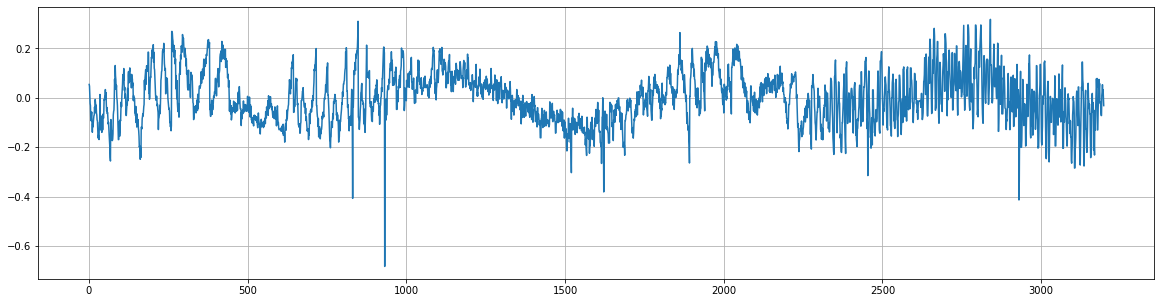

In [9]:
import numpy as np 
import matplotlib.pyplot as plt
star_0 = norm_train_df.iloc[0,1:]
star_0.head()
plt.figure(figsize=(20,5))
plt.plot(np.arange(1,3198),star_0)
plt.grid()
plt.show()

####The `np.fft.fft()` & `np.abs()` Functions

In [10]:
fft_star_0=np.abs(np.fft.fft(star_0))
fft_star_0

array([6.00470566e-15, 2.27324760e+00, 3.57228832e+01, ...,
       3.39782358e+01, 3.57228832e+01, 2.27324760e+00])

In [11]:
np.abs(2+3j)

3.605551275463989

Plotting Fourier Transformed values for `star_0`

In [12]:
freq=np.fft.fftfreq(len(star_0))
freq

array([ 0.        ,  0.00031279,  0.00062559, ..., -0.00093838,
       -0.00062559, -0.00031279])

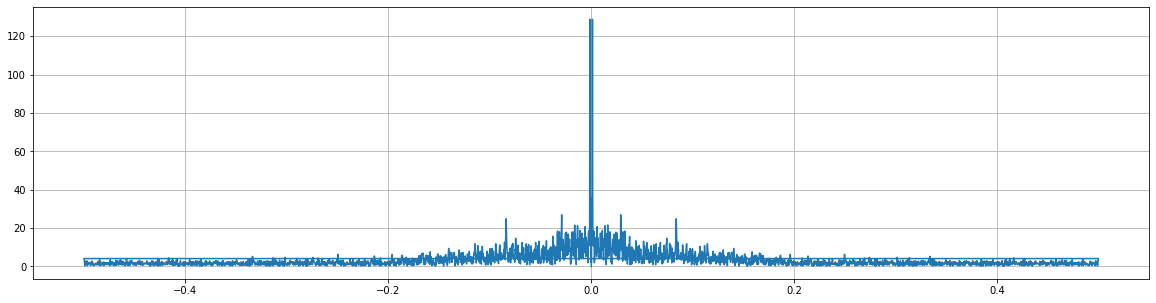

In [13]:
plt.figure(figsize=(20,5))
plt.plot(freq,fft_star_0)
plt.grid()
plt.show()


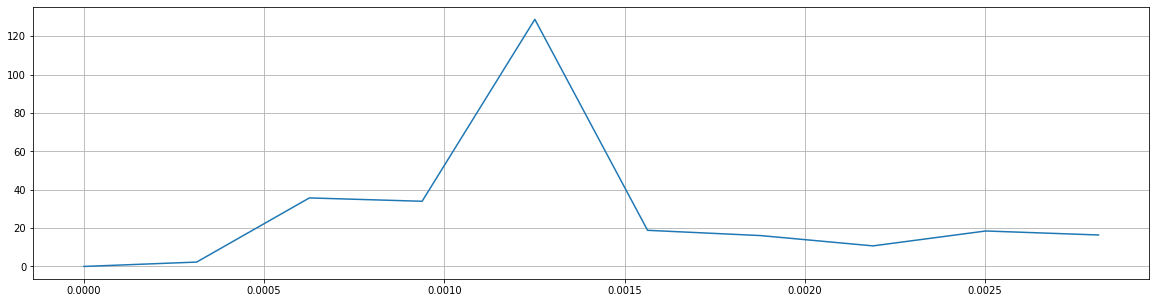

In [14]:
plt.figure(figsize=(20,5))
plt.plot(freq[:10],fft_star_0[:10])
plt.grid()
plt.show()

In [15]:
def fast_fourier_transform(star):
  fft_star=np.fft.fft(star)
  return np.abs(fft_star)

In [16]:
x_fft_train_T=norm_train_df.iloc[:,1:].T.apply(fast_fourier_transform,axis = 0)

x_fft_train = x_fft_train_T.T
x_fft_train.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,6.004706e-15,2.273248,35.722883,33.978236,128.816503,18.835061,16.101795,10.722037,18.488302,16.400976,...,1.920231,16.400976,18.488302,10.722037,16.101795,18.835061,128.816503,33.978236,35.722883,2.273248
1,4.094300e-15,30.299298,36.918808,38.376852,22.149931,33.282191,27.734204,11.862346,14.001221,14.221386,...,11.833992,14.221386,14.001221,11.862346,27.734204,33.282191,22.149931,38.376852,36.918808,30.299298
2,3.742374e-15,66.809870,19.498262,170.268810,48.413391,88.178733,57.407061,38.684283,10.503268,46.482585,...,22.681374,46.482585,10.503268,38.684283,57.407061,88.178733,48.413391,170.268810,19.498262,66.809870
3,8.024386e-15,19.369720,52.151962,108.097894,100.659024,269.416639,77.435861,71.256558,54.895479,33.335462,...,26.711804,33.335462,54.895479,71.256558,77.435861,269.416639,100.659024,108.097894,52.151962,19.369720
4,4.881195e-15,113.576655,51.382781,146.597215,148.627668,103.842855,116.738548,28.957862,36.451207,69.375686,...,4.923027,69.375686,36.451207,28.957862,116.738548,103.842855,148.627668,146.597215,51.382781,113.576655


---

####The `xlabel()` & `ylabel()` Functions

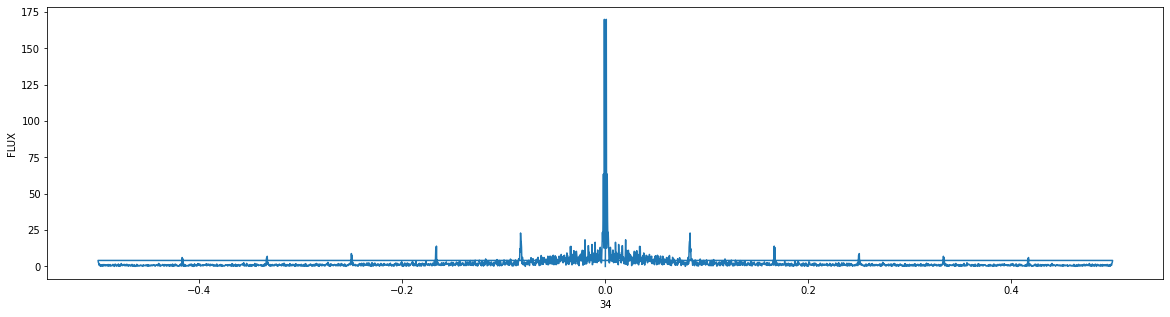

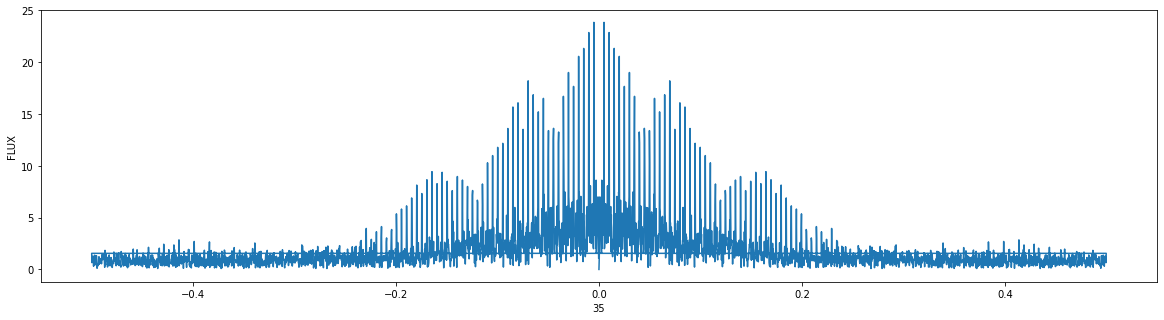

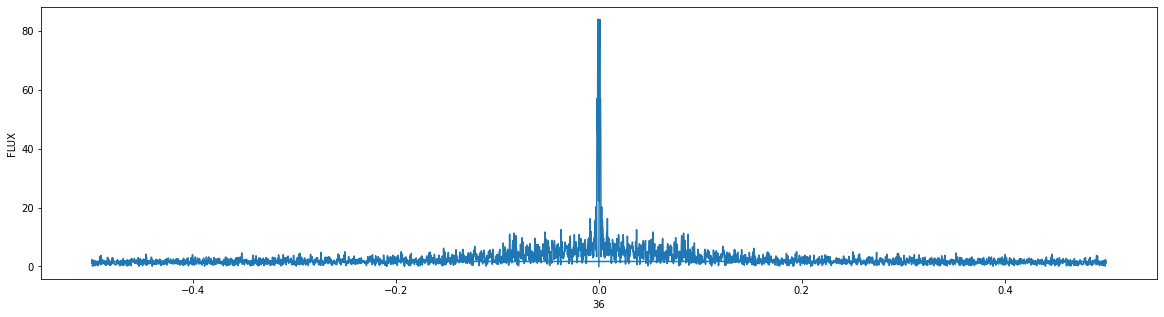

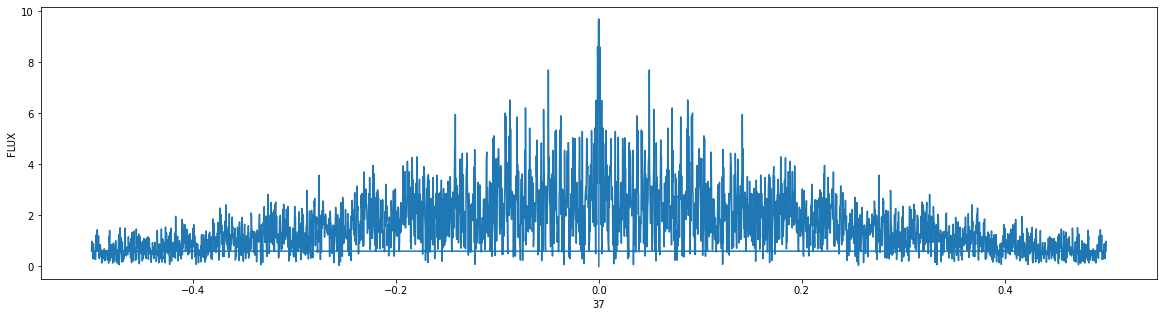

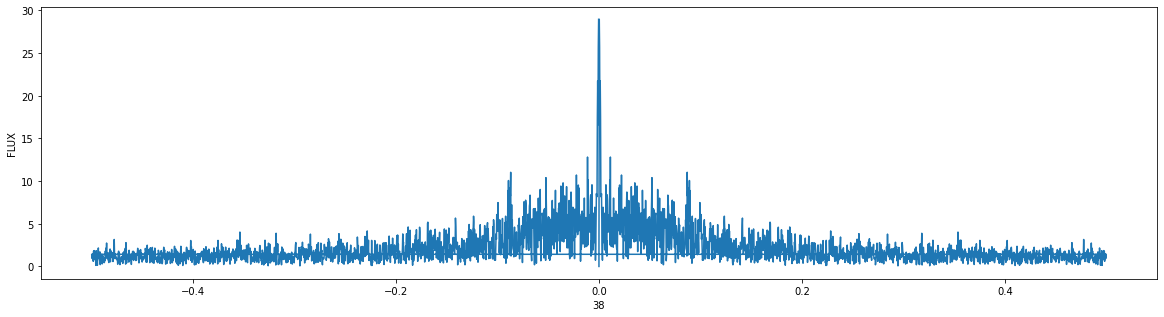

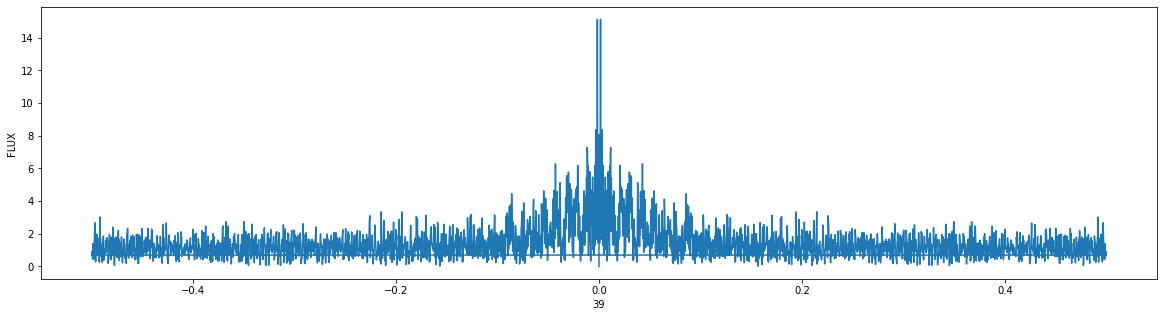

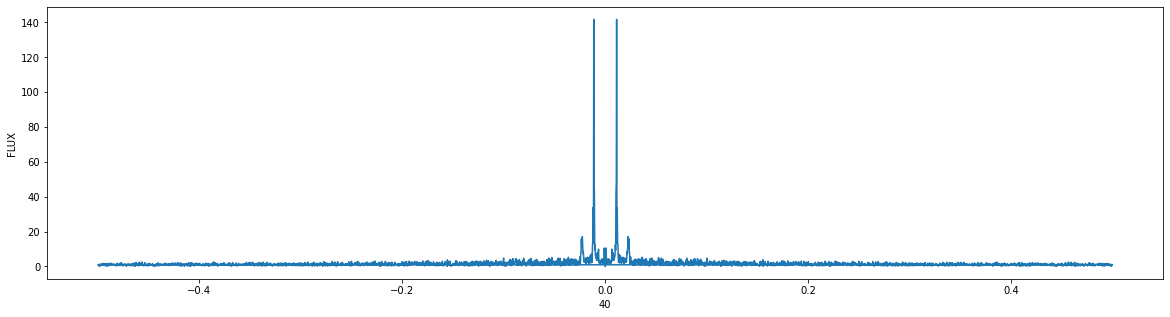

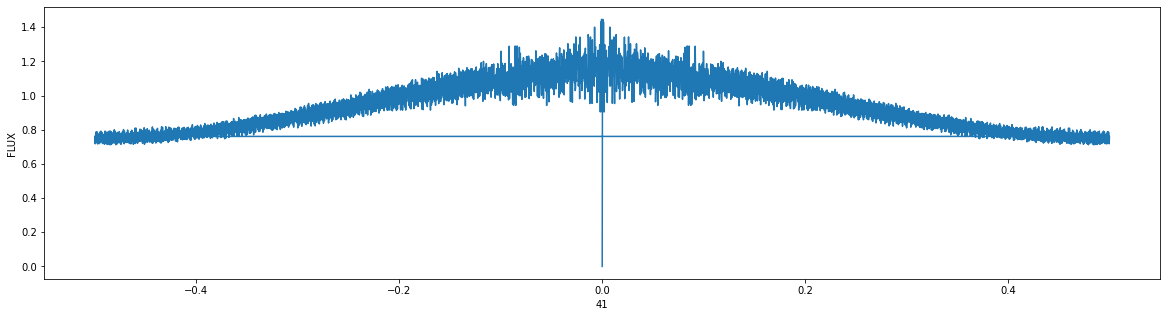

In [17]:
for i in range(34,42):
  plt.figure(figsize=(20,5))
  plt.xlabel(str(i))
  plt.ylabel('FLUX')
  plt.plot(freq,x_fft_train.iloc[i,:])
  plt.show()

In [18]:
x_fft_test_T=norm_test_df.iloc[:,1:].T.apply(fast_fourier_transform,axis = 0)
x_fft_test = x_fft_test_T.T
x_fft_test.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,8.950904e-16,23.184733,40.545472,17.994173,13.772498,16.594294,17.532422,8.094149,8.045917,9.549431,...,7.981027,9.549431,8.045917,8.094149,17.532422,16.594294,13.772498,17.994173,40.545472,23.184733
1,8.965352e-15,135.637702,42.680618,28.017660,17.672923,16.099550,62.999485,27.005547,26.735149,29.708628,...,9.883983,29.708628,26.735149,27.005547,62.999485,16.099550,17.672923,28.017660,42.680618,135.637702
2,1.369225e-14,101.624620,26.553454,11.634754,11.720122,46.153088,23.677302,22.208643,14.393021,3.278532,...,7.742408,3.278532,14.393021,22.208643,23.677302,46.153088,11.720122,11.634754,26.553454,101.624620
3,2.373386e-15,37.305651,20.537365,5.108229,16.309293,20.286675,18.969927,6.010526,8.763040,6.370417,...,16.668561,6.370417,8.763040,6.010526,18.969927,20.286675,16.309293,5.108229,20.537365,37.305651
4,6.684428e-15,7.138386,11.941614,12.808132,27.841397,39.681676,17.985758,30.233859,14.800046,8.501530,...,5.167375,8.501530,14.800046,30.233859,17.985758,39.681676,27.841397,12.808132,11.941614,7.138386


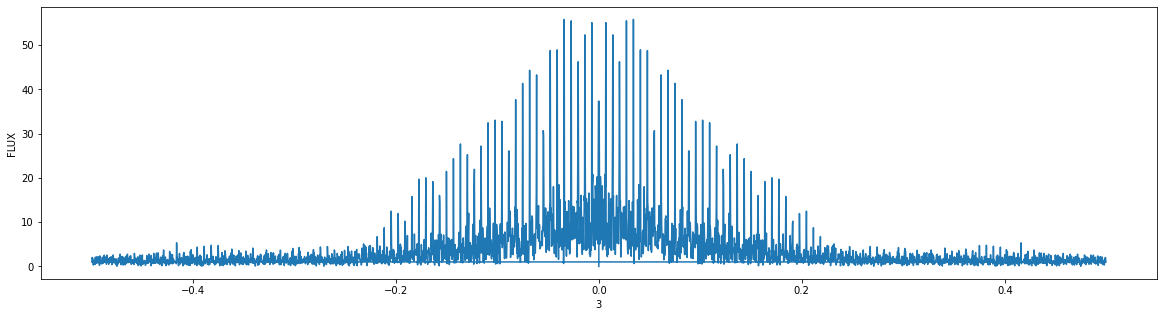

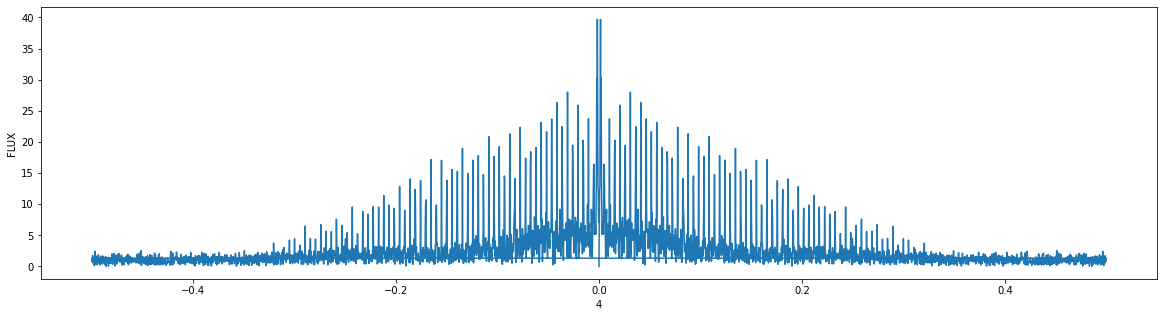

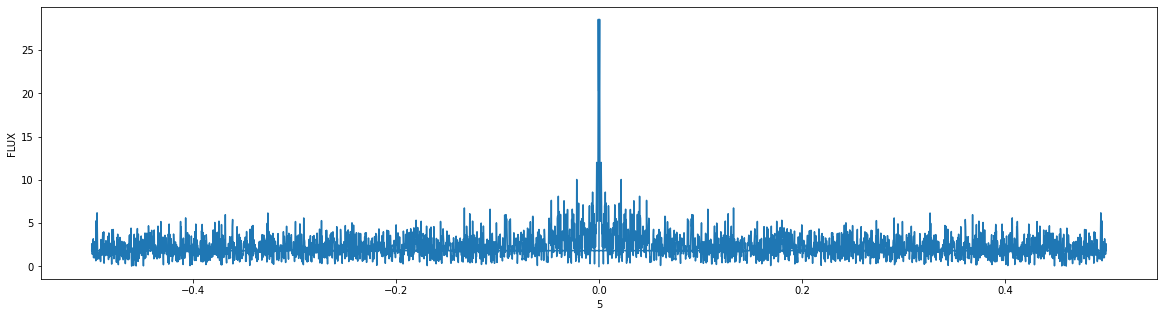

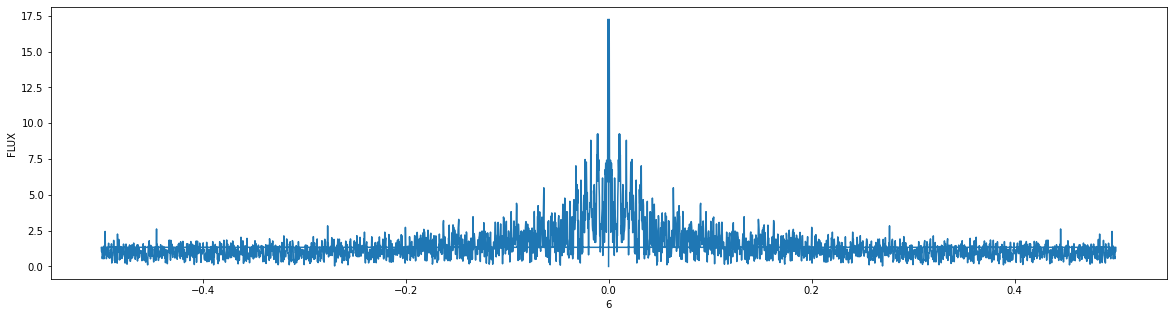

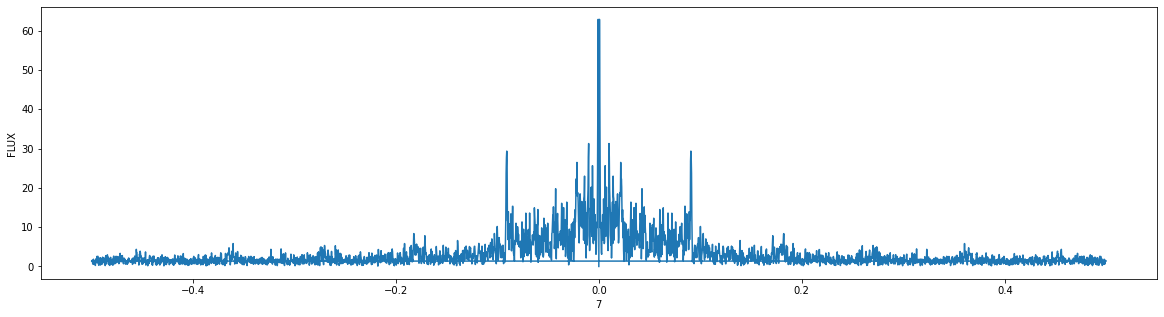

In [19]:
for i in range(3,8):
  plt.figure(figsize=(20,5))
  plt.xlabel(str(i))
  plt.ylabel('FLUX')
  plt.plot(freq,x_fft_test.iloc[i,:])
  plt.show()

---